In [2455]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Импорт данных и первичный просмотр

Импорт данных из файла в формате csv

In [2456]:
file = 'S02-hw-dataset.csv' 
data = pd.read_csv(file, sep = ",") 
data 

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


Первые строки датасета

In [2457]:
data.head() #Первые строки датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Информация о столбцах и типах

In [2458]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Описание

In [2459]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Стандартное отклонение по revenue - выручке

In [2460]:
data.revenue.std()

np.float64(613.127268648994)

Доля пропусков в каждом столбце

In [2461]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Дубликаты с 0 по 20 элементы

In [2462]:
data.duplicated().truncate(0,20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

Дубликаты с 21 по 40 элементы

In [2463]:
data.duplicated().truncate(21,40)

21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

#### 2. Контроль качества

Проверка уникальности user_id 
 - Если айди нулевой
 - Если он меньше нуля
 - Если дублируется

In [2464]:
useridAnomaly = data[(data["user_id"].isna()) | (data["user_id"] < 0) | (data["user_id"].duplicated(False))]
display(useridAnomaly)

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


Валидность возраста
 - Если возраст больше 100
 - Если возраст меньше 10
 - Если возраста нет

In [2465]:
ageAnomaly = data[((data["age"] > 100) | (data["age"] < 10) | data["age"].isna())]
display(ageAnomaly) 

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488


Валидность колонки покупок
 - Если количество больше 100
 - Если количество покупок больше нуля, а выручка 0 
 - Если количество покупок нулевое

In [2466]:
purchasesAnomaly = data[(data["purchases"] < 0) | ((data["purchases"] > 0) & (data["revenue"] <= 0)) | data["purchases"].isna()]
display(purchasesAnomaly)

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


Всего аномалий, выводы. 

In [2467]:
totalAnomalies = len(useridAnomaly) + len(ageAnomaly) + len(purchasesAnomaly)
totalAnomalies

8

Итого было найдено 8 аномалий. Они связанны с 
 - Невалидностью, найдены завышенные значения возраста и наоборот, отрицательным количеством покупок
 - Полнотой, были найдены пустые поля age
 - Целостностью - для 4 покупок была получена 0 выручка, что некорректно
 - Уникальностью - была найдена полностью дублирующаяся строка с user_id "10" 
  

Найдены достаточно критичные проблемы с качеством полученных данных, особенно учитывая соотношение количества этих самых данных к количеству проблем.

#### 3. Базовый EDA: группировки, агрегаты и частоты

In [2468]:
countries = data["country"].value_counts() # Сгруппируем по странам
display(countries) 

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [2469]:
data.groupby("country").agg({"purchases" : ["mean", "sum"]}) # Сгруппируем страны по среднему количеству покупок и их сумме

purchases    
             mean sum
country              
CN       4.500000   9
DE       6.500000  39
FR       4.250000  51
RU       4.769231  62
US       4.625000  37

In [2470]:
data["age_group"] = pd.cut(data["age"], bins = [0,50,100], labels = ["young", "old"]) # создадим новый стоблец age_group, разрезав столбец по bins 
data

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,young
1,2,24.0,RU,5,1115,young
2,3,52.0,FR,7,399,old
3,4,31.0,RU,6,654,young
4,5,NaN,DE,6,1296,NaN
5,6,120.0,FR,-1,785,NaN
6,7,46.0,RU,0,0,young
7,8,28.0,CN,2,456,young
8,9,39.0,US,4,980,young
9,10,24.0,RU,7,511,young


In [2471]:
data.groupby("age_group", observed = True)["revenue"].mean() # а теперь сгруппируем этот столбец по средней выручке

age_group
young    854.093750
old      596.666667
Name: revenue, dtype: float64

Чаще всего встречаются пользователи из России и Франции, реже же всего - из Штатов и Китая. Однако самое большое количество покупок на человека преобладает в Германии и России. Самой высокой выручкой на душу населения обладают Германия и Китай, однако в целом самую большую выручку сгенерировали Россия и Германия. Если разбить население на две возрастные группы, до 50 и после, то видно, что группа людей возраста до 50 принесла в полтора раза больше выручки.

#### 4. Визуализация в matplotlib

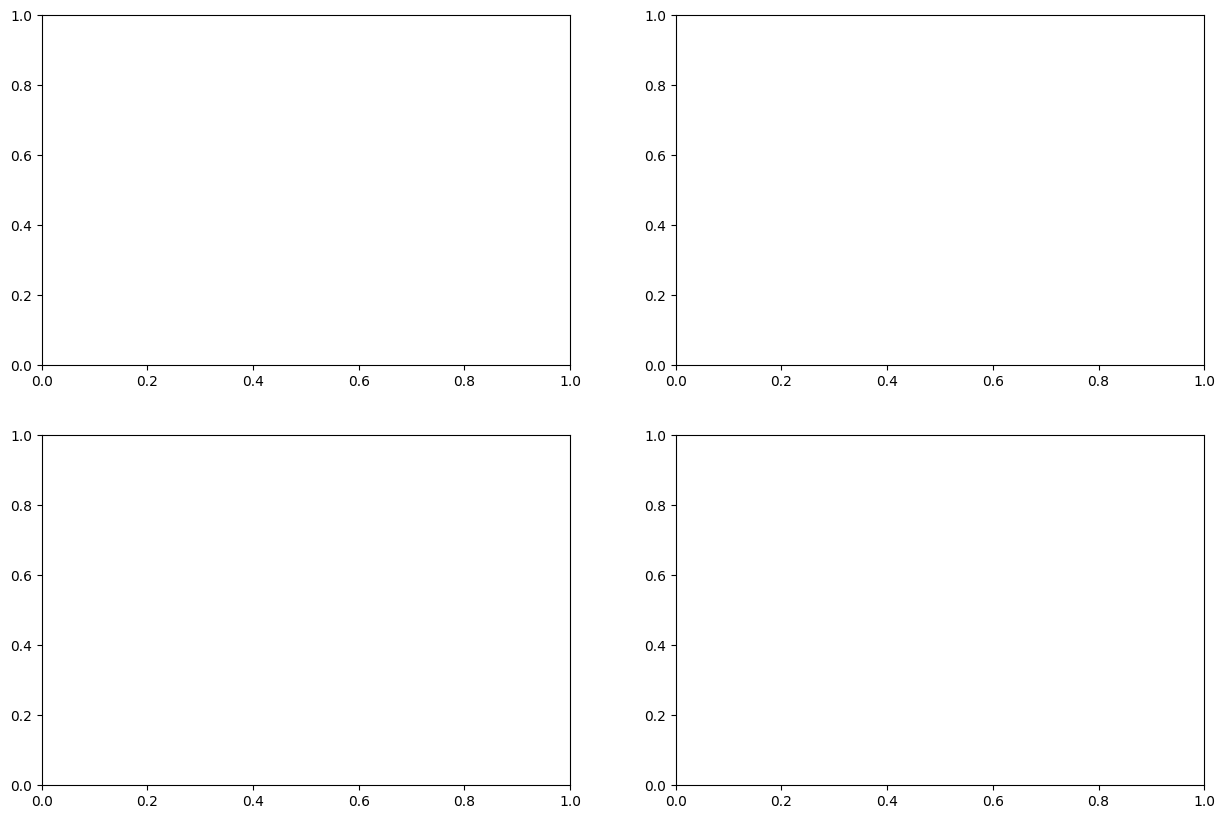

In [2472]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize= (15,10)) # Создание полотна 2 на 2 графика размером 15 на 10 дюймов

Создадим гистограмму на графике ax4, отображающую распреление по возрастам

In [2473]:
ax4.hist(data["age"], bins = 10, color = "skyblue")
ax4.set_xlabel("age") 
ax4.set_ylabel("count")
ax4.set_title("Age histogram")
pass

Создадим boxplot на графике ax1, отображающий количество покупок по странам. Зеленым обозначена медиана, сама "коробка" показывает распредедение между первым и третим квартилем, красные "усы" - максимальное и минимальное значения без выбросов

In [2474]:
data.boxplot(column="purchases", by="country", ax = ax1, color = dict(whiskers = "red", boxes = "blue"))
ax1.set_title("Purchases amount by countries")
ax1.set_xlabel("country")
ax1.set_ylabel("purchases")
pass

Создадим scatter на графике ax2, показывающий зависимость выручки от количества покупок. Цвет показывает возраст покупателя. Как можно увидеть, существует зависимость. 

In [2475]:
ax2.scatter(data["purchases"], data["revenue"],c = data["age"], cmap = "RdYlGn") 
ax2.set_title("Purchases/Revenue Dependancy") 
ax2.set_xlabel("purchases")
ax2.set_ylabel("revenue")
pass

Построим круговую диаграмму на графике ax3, показывающую доли каждой страны в общем количестве юзеров. 

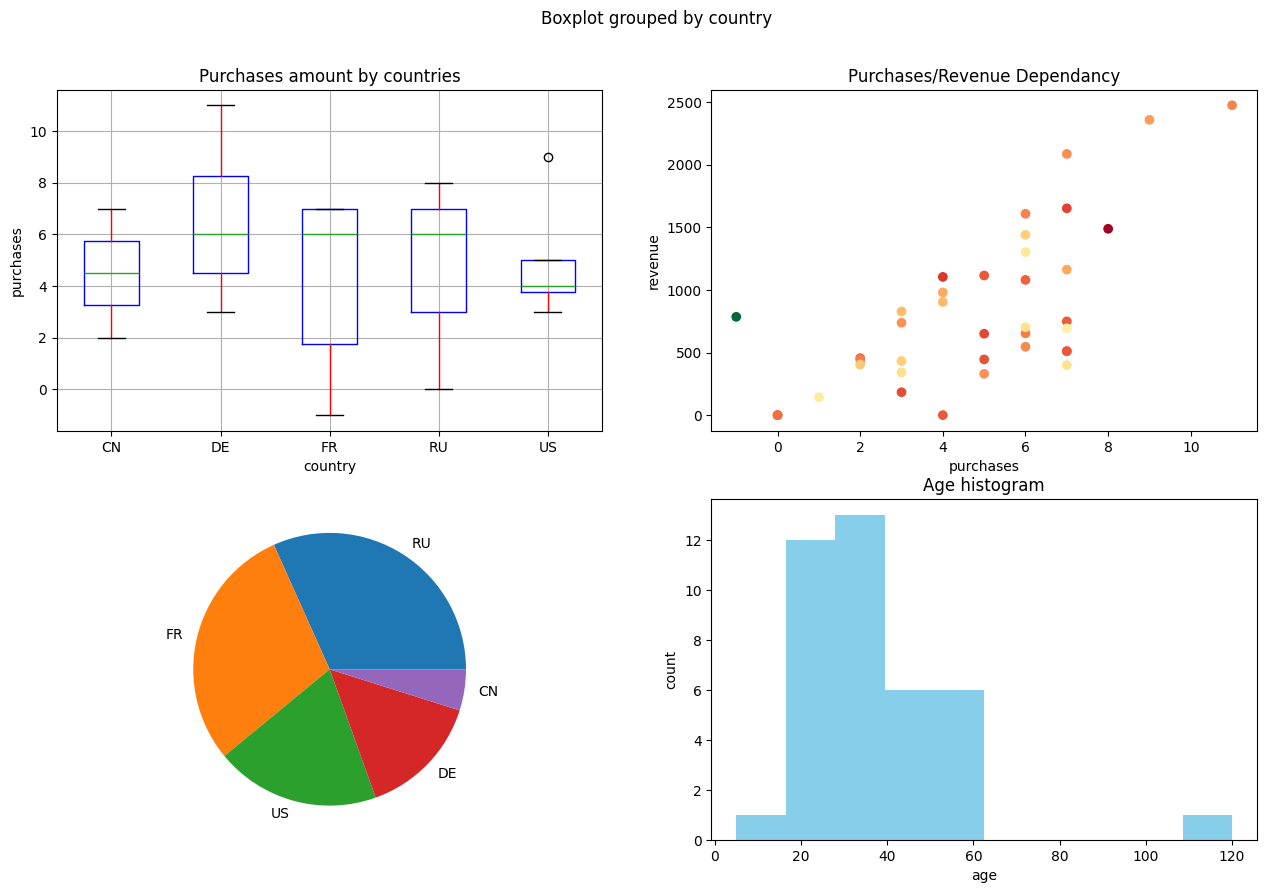

In [2476]:
countriesAmount = data["country"].value_counts().values
countriesLabels = data["country"].value_counts().index
ax3.pie(countriesAmount,labels = countriesLabels)
fig.savefig("./figures/test-plot.png") # Сохраним графики как картинку 
display(fig)